<a href="https://colab.research.google.com/github/omkarhegde1999/Walmart---EDA-CLT-Confidence-Interval/blob/main/Walmart_EDA%2CCLT_%26_Confidence_Interval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Walmart - Confidence Interval and CLT

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

Business Problem¶

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).



Understanding the Dataset

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

User_ID: User ID

Product_ID: Product ID

Gender: Sex of User

Age: Age in bins

Occupation: Occupation(Masked)

City_Category: Category of the City (A,B,C)

StayInCurrentCityYears: Number of years stay in current city

Marital_Status: Marital Status

ProductCategory: Product Category (Masked)

Purchase: Purchase Amount



Importing the Necessary Libraries



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats

Importing and reading csv file

In [ ]:
df = pd.read_csv("/content/walmart.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0
...,...,...,...,...,...,...,...,...,...,...
125209,1001306,P00198742,M,26-35,3.0,B,3,0.0,1.0,19446.0
125210,1001306,P00332142,M,26-35,3.0,B,3,0.0,8.0,8132.0
125211,1001306,P00168442,M,26-35,3.0,B,3,0.0,5.0,3500.0
125212,1001306,P00002042,M,26-35,3.0,B,3,0.0,1.0,15270.0


In [ ]:
df.shape

(125214, 10)

In [ ]:
print(f"Number of rows : {df.shape[0]} \nNumber of columns : {df.shape[1]}")

Number of rows : 125214 

Number of columns : 10


There are no null values

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    1
Gender                        1
Age                           1
Occupation                    1
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category              1
Purchase                      1
dtype: int64

There are no duplicte values

In [ ]:
df.duplicated().sum()

0

Checking unique values

In [ ]:
df.nunique().sort_values(ascending=False)

Purchase                      14591
User_ID                        5853
Product_ID                     3369
Occupation                       21
Product_Category                 18
Age                               7
Stay_In_Current_City_Years        5
City_Category                     3
Gender                            2
Marital_Status                    2
dtype: int64

In [ ]:
#Knowing the information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 125214 entries, 0 to 125213

Data columns (total 10 columns):

 #   Column                      Non-Null Count   Dtype  

---  ------                      --------------   -----  

 0   User_ID                     125214 non-null  int64  

 1   Product_ID                  125213 non-null  object 

 2   Gender                      125213 non-null  object 

 3   Age                         125213 non-null  object 

 4   Occupation                  125213 non-null  float64

 5   City_Category               125213 non-null  object 

 6   Stay_In_Current_City_Years  125213 non-null  object 

 7   Marital_Status              125213 non-null  float64

 8   Product_Category            125213 non-null  float64

 9   Purchase                    125213 non-null  float64

dtypes: float64(4), int64(1), object(5)

memory usage: 9.6+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,125214.0,1.002861e+06,3342.540333,10.0,1001243.0,1002872.0,1004379.0,1006040.0
Occupation,125213.0,8.073315e+00,6.541858,0.0,2.0,7.0,14.0,20.0
Marital_Status,125213.0,4.099654e-01,0.491829,0.0,0.0,0.0,1.0,1.0
Product_Category,125213.0,5.298515e+00,3.739806,1.0,1.0,5.0,8.0,18.0
Purchase,125213.0,9.305255e+03,4978.651680,185.0,5853.0,8052.0,12057.0,23961.0


This shows average amount spend by Male and Female.

In [ ]:
df.groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,30745.0,8776.171117,4692.525634,188.0,5450.00,7924.0,11403.00,23948.0
M,94468.0,9477.447919,5056.386848,185.0,5890.75,8101.0,12517.25,23961.0


Here we get to know that this data is heavily baised by purchase rate of Males

In [ ]:
df.groupby("Gender")["User_ID"].nunique()

Gender
F    1647
M    4205
Name: User_ID, dtype: int64

Just basic visual of boxplot to understand better

<Axes: xlabel='Gender', ylabel='Purchase'>

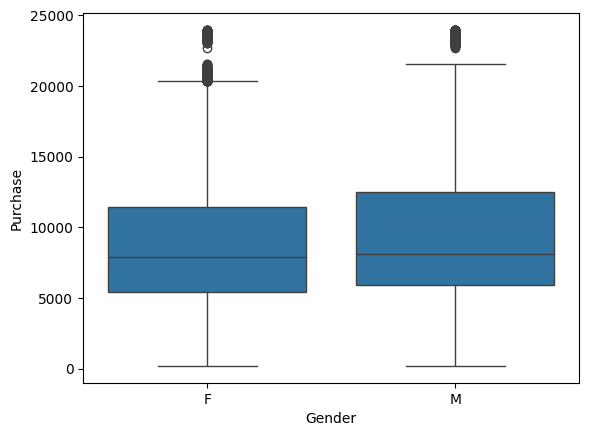

In [ ]:
sns.boxplot(x='Gender', y='Purchase', data=df)

This states that this is not a Normal Distribution in purchase by gender

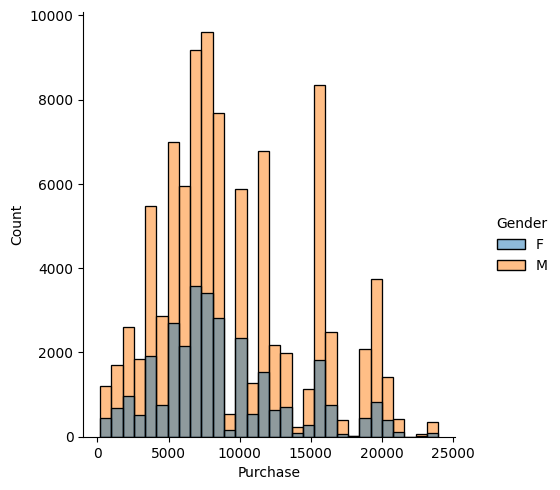

In [ ]:
sns.displot(x="Purchase",data=df,bins=30,hue="Gender")

###Assume that this is a Population to understand CLT

In [ ]:
df.groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,30745.0,8776.171117,4692.525634,188.0,5450.00,7924.0,11403.00,23948.0
M,94468.0,9477.447919,5056.386848,185.0,5890.75,8101.0,12517.25,23961.0


Let's take random sample of 300 out of the dataset and run it 4 times to check if we get mean value closer or approximate to the Population mean

In [ ]:
#1
df.sample(300).groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,74.0,8468.108108,4724.773627,740.0,5419.0,7854.0,9980.50,19676.0
M,226.0,9530.508850,5288.228709,771.0,5570.0,7898.5,13156.25,23446.0


In [ ]:
#2
df.sample(3000).groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,718.0,8599.722841,4747.962898,567.0,5397.50,7854.0,10091.25,23442.0
M,2282.0,9566.435145,5052.602617,556.0,5938.25,8129.0,12816.50,23949.0


In [ ]:
#3
df.sample(30000).groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,7360.0,8833.890082,4655.964235,197.0,5470.0,7942.0,11508.00,23938.0
M,22640.0,9475.513074,5056.617612,187.0,5890.0,8102.0,12544.75,23953.0


In [ ]:
#4
df.sample(300).groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,75.0,8087.333333,4435.609737,398.0,5156.0,7606.0,10837.0,23321.0
M,225.0,10107.524444,5115.051290,760.0,6956.0,8786.0,15207.0,20923.0


###CLT

In [ ]:
#CLT of purchases for Males

sample_x = 500
iterations = 1000

male_sample_mean = [df[df["Gender"]=="M"].sample(sample_x,replace=True)["Purchase"].mean() for i in range(iterations)]
male_sample_mean


[9873.972,
 9459.428,
 9546.79,
 9239.27,
 9513.55,
 9367.544,
 9479.18,
 9815.88,
 9542.36,
 9576.25,
 9719.256,
 9539.074,
 9700.848,
 9236.434,
 9657.386,
 9630.516,
 9042.182,
 9210.392,
 9426.6,
 9835.408,
 9923.17,
 9444.166,
 9570.03,
 9529.828,
 9449.52,
 9726.648,
 9293.7,
 8953.858,
 9151.236,
 9555.372,
 9753.37,
 9079.058,
 10017.096,
 9473.214,
 9480.03,
 9653.35,
 9412.306,
 9688.258,
 9121.44,
 9487.62,
 9808.0,
 9487.168,
 9765.088,
 9584.818,
 9462.938,
 9917.894,
 9486.734,
 9688.136,
 9213.684,
 9698.868,
 9875.174,
 9364.328,
 9392.22,
 9331.914,
 9632.724,
 9250.398,
 9420.474,
 9323.848,
 9399.476,
 9652.11,
 9151.5,
 9795.124,
 9801.534,
 9724.112,
 9031.97,
 9623.832,
 9413.208,
 9075.874,
 9433.884,
 9290.23,
 9332.11,
 9667.046,
 9336.568,
 9544.848,
 9694.248,
 9257.772,
 9190.648,
 9491.106,
 9272.47,
 9660.8,
 9303.814,
 9503.414,
 9698.756,
 9285.574,
 9459.912,
 9714.138,
 9955.402,
 9176.434,
 9654.056,
 9066.846,
 9227.506,
 9382.176,
 9407.596,
 9469.1

In [ ]:
#CLT of purchases for Females

sample_y = 500
itrrations = 1000

female_sample_mean = [df[df["Gender"]=="F"].sample(sample_y, replace=True)["Purchase"].mean() for i in range(iterations)]
female_sample_mean

[8779.252,
 8589.508,
 8604.188,
 8828.514,
 9013.07,
 8639.622,
 8752.378,
 8834.57,
 8531.762,
 8939.466,
 8791.48,
 8743.23,
 8710.922,
 8598.326,
 8881.608,
 8688.942,
 8749.516,
 8540.07,
 8878.372,
 8571.07,
 8751.634,
 9419.998,
 9427.366,
 8605.252,
 8647.694,
 8441.682,
 8784.834,
 8482.416,
 8955.658,
 8946.734,
 8629.966,
 8985.514,
 8853.094,
 8768.758,
 8472.654,
 8438.362,
 8629.144,
 8448.568,
 8738.918,
 8779.294,
 8385.87,
 8984.258,
 8926.208,
 8769.972,
 8938.504,
 8432.198,
 8650.338,
 8669.088,
 9198.46,
 9440.028,
 8645.836,
 8633.116,
 8724.256,
 8509.498,
 9115.31,
 8245.9,
 8664.452,
 8657.75,
 9086.964,
 8394.686,
 8757.412,
 9017.006,
 8800.402,
 8618.632,
 8811.708,
 8431.07,
 8997.46,
 8548.566,
 8920.324,
 8838.466,
 8480.55,
 8580.974,
 8829.658,
 8504.306,
 8668.99,
 8743.742,
 8416.536,
 8553.726,
 8673.206,
 9032.554,
 8932.2,
 8605.998,
 8853.608,
 8916.652,
 8750.968,
 8681.148,
 8600.016,
 8606.788,
 8602.996,
 8781.888,
 8457.658,
 8786.272,
 8772.

This states that Sample mean is approximate same as Population mean.

In [ ]:
np.mean(male_sample_mean)

9487.586673999998

In [ ]:
np.mean(female_sample_mean)

8778.366386

Now you can see a Normal Distribution

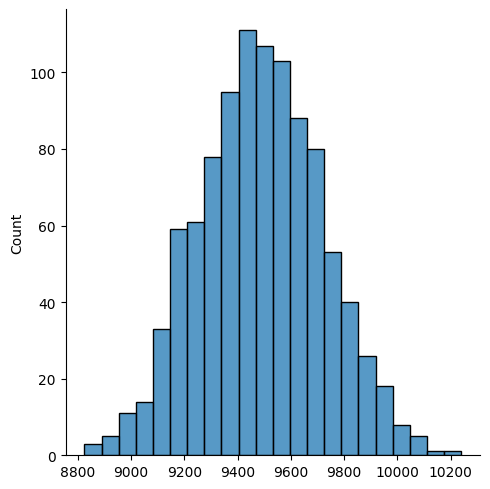

In [ ]:
sns.displot(male_sample_mean)

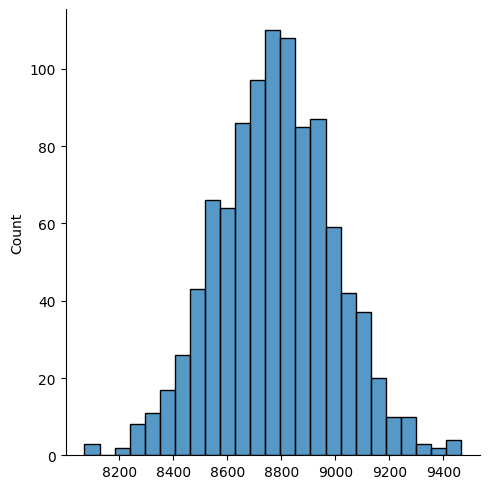

In [ ]:
sns.displot(female_sample_mean)

Calculate Confidence Interval

#2 ways
1. z score


In [ ]:
#95%
male_upper_limit = np.mean(male_sample_mean) + 1.96 * np.std(male_sample_mean)
male_lower_limit = np.mean(male_sample_mean) - 1.96 * np.std(male_sample_mean)


In [ ]:
np.std(male_sample_mean)

230.28218037544661

In [ ]:
female_upper_limit = np.mean(female_sample_mean) + 1.96 * np.std(female_sample_mean)
female_lower_limit = np.mean(female_sample_mean) - 1.96 * np.std(female_sample_mean)



In [ ]:
(male_upper_limit,male_lower_limit)


(9938.939747535873, 9036.233600464124)

In [ ]:
(female_upper_limit,female_lower_limit)

(9199.40519730847, 8357.32757469153)

Here you can observe that the confidence intervall is overlapping hence in order to overcome that we need to :
1. Increase our sample set
2. Decrease the confidence interval

2) Percentile

In [ ]:
np.percentile(male_sample_mean,[2.5,97.5])

array([9053.6442 , 9931.18105])

In [ ]:
np.percentile(female_sample_mean,[2.5,97.5])

array([8356.5055, 9197.8906])

Increase the Sample set

In [ ]:
sample_x = 1000
iterations = 1500

male_mean = [df[df["Gender"]=="M"].sample(sample_x,replace=True)["Purchase"].mean() for i in range(iterations)]

In [ ]:
sample_y = 1000
iterations = 1500

female_mean = [df[df["Gender"]=="F"].sample(sample_x,replace=True)["Purchase"].mean() for i in range(iterations)]

In [ ]:
np.mean(male_mean)

9481.419272666666

In [ ]:
np.mean(female_mean)

8778.276706666666

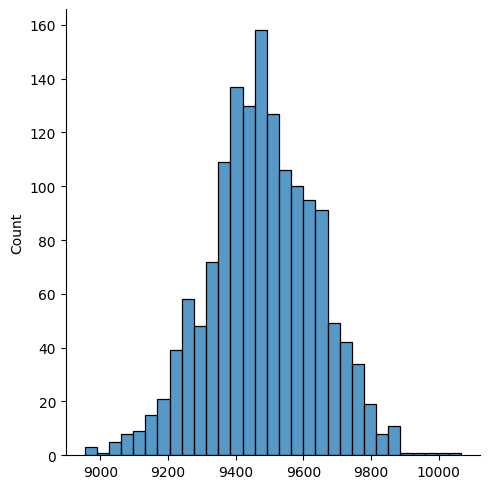

In [ ]:
sns.displot(male_mean)

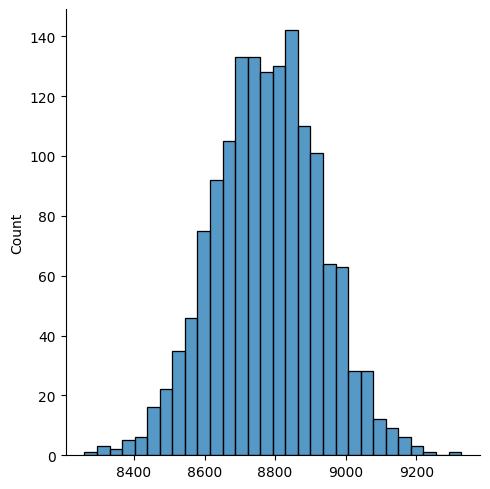

In [ ]:
sns.displot(female_mean)

Z score

In [ ]:
#90%
male_upper_limit_x = np.mean(male_mean) + 1.645 * np.std(male_mean)
male_lower_limit_x = np.mean(male_mean) - 1.645 * np.std(male_mean)


In [ ]:
female_upper_limit_x = np.mean(female_mean) + 1.645 * np.std(female_mean)
female_lower_limit_x = np.mean(female_mean) - 1.645 * np.std(female_mean)

In [ ]:
(male_upper_limit_x,male_lower_limit_x)

(9744.258532536536, 9218.580012796796)

In [ ]:
(female_upper_limit_x,female_lower_limit_x)

(9026.272229127122, 8530.28118420621)

Percentile

In [ ]:
np.percentile(male_mean,[2.5,97.5])

array([9154.29605, 9789.38995])

In [ ]:
np.percentile(female_mean,[2.5,97.5])

array([8482.344775, 9065.663   ])

Conclusion:-
After incresing the sample set and doing CLT and CI. We can conclude that Male spents more than Female.

Now let's check for Married and Unmarried

In [ ]:
df['Marital_Status'].replace(to_replace = 0, value = 'Unmarried', inplace = True)
df['Marital_Status'].replace(to_replace = 1, value = 'Married', inplace = True)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,Unmarried,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,Unmarried,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,Unmarried,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,Unmarried,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,Unmarried,8.0,7969.0
...,...,...,...,...,...,...,...,...,...,...
125209,1001306,P00198742,M,26-35,3.0,B,3,Unmarried,1.0,19446.0
125210,1001306,P00332142,M,26-35,3.0,B,3,Unmarried,8.0,8132.0
125211,1001306,P00168442,M,26-35,3.0,B,3,Unmarried,5.0,3500.0
125212,1001306,P00002042,M,26-35,3.0,B,3,Unmarried,1.0,15270.0


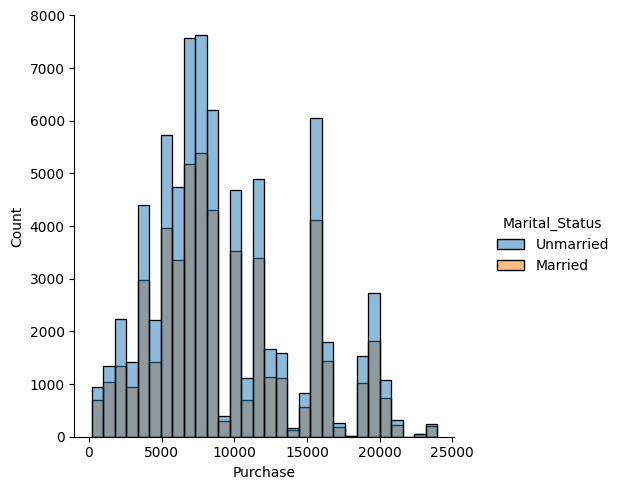

In [ ]:
sns.displot(x="Purchase",data=df,bins=30,hue="Marital_Status")


In [ ]:
df.groupby("Marital_Status")["Purchase"].describe()


,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Married,51333.0,9324.828181,4969.269495,187.0,5881.0,8064.0,12057.0,23961.0
Unmarried,73880.0,9291.655739,4985.148539,185.0,5830.0,8043.0,12058.0,23961.0




* There is no difference in the mean or median values for both of them.



Lets dive deeper in to verify.

Lets plot the mean of 1000 Random Samples with 90% Confidence Interval

In [ ]:
sample_x = 15500
iterations = 1000

unmarried_sample_mean = [df[df["Marital_Status"]=="Unmarried"].sample(sample_x,replace=True)["Purchase"].mean() for i in range(iterations)]
unmarried_sample_mean

[9314.695612903226,
 9258.581935483871,
 9326.980516129031,
 9334.657225806452,
 9249.09941935484,
 9286.050903225807,
 9322.364193548387,
 9352.170580645161,
 9248.566774193549,
 9365.933870967741,
 9257.286387096774,
 9264.872193548386,
 9282.963225806452,
 9205.70864516129,
 9372.123483870968,
 9279.728193548388,
 9266.62806451613,
 9239.100129032258,
 9268.800838709678,
 9282.064516129032,
 9298.97,
 9385.87606451613,
 9288.073935483872,
 9360.797806451614,
 9386.366516129032,
 9305.759290322581,
 9224.76677419355,
 9281.10329032258,
 9281.417612903226,
 9306.387032258064,
 9333.291677419355,
 9351.005677419354,
 9268.613032258065,
 9270.890580645162,
 9377.306451612903,
 9262.990322580645,
 9287.991225806452,
 9337.625935483871,
 9308.35664516129,
 9286.014387096775,
 9377.062451612903,
 9356.618258064516,
 9255.234516129032,
 9268.57606451613,
 9267.844193548388,
 9293.68070967742,
 9295.646193548388,
 9282.037741935485,
 9315.083032258064,
 9239.479870967742,
 9294.852322580646,

In [ ]:
np.mean(unmarried_sample_mean)

9292.799242903226

In [ ]:
sample_x = 155500
iterations = 1000

married_sample_mean = [df[df["Marital_Status"]=="Married"].sample(sample_x,replace=True)["Purchase"].mean() for i in range(iterations)]
married_sample_mean

[9340.59459807074,
 9315.252334405144,
 9329.47831511254,
 9318.117839228296,
 9334.368565916398,
 9321.1964244373,
 9336.861196141479,
 9334.796900321544,
 9305.773209003215,
 9325.53463022508,
 9330.588990353697,
 9326.848321543408,
 9339.672302250803,
 9320.179395498391,
 9342.096688102894,
 9316.286881028938,
 9326.44059807074,
 9333.273125401929,
 9352.641350482316,
 9313.655736334405,
 9318.906823151125,
 9314.471607717041,
 9326.609067524116,
 9301.446758842443,
 9324.749093247588,
 9319.688154340836,
 9305.321884244373,
 9334.875112540192,
 9313.458790996785,
 9328.2082829582,
 9335.884565916398,
 9313.025832797428,
 9313.24582636656,
 9310.981897106109,
 9342.967440514469,
 9325.286186495177,
 9335.045106109324,
 9315.786881028938,
 9325.710482315113,
 9328.216816720258,
 9326.136,
 9312.46466881029,
 9324.06112540193,
 9337.517594855306,
 9328.533736334404,
 9314.625807073955,
 9319.743633440514,
 9331.156379421222,
 9317.260475884244,
 9322.235524115755,
 9340.435922829582,


In [ ]:
np.mean(married_sample_mean)

9324.753473479099

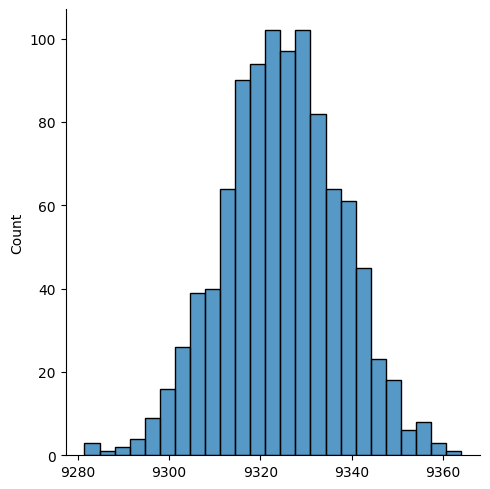

In [ ]:
sns.displot(married_sample_mean)

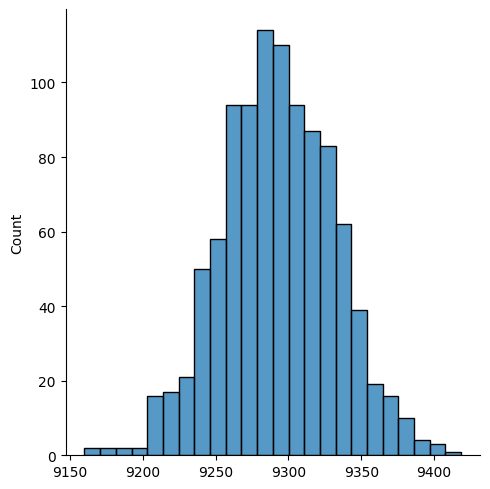

In [ ]:
sns.displot(unmarried_sample_mean)

In [ ]:
married_upper_limit = np.mean(married_sample_mean) + 1.96 * np.std(married_sample_mean)
married_lower_limit = np.mean(married_sample_mean) - 1.96 * np.std(married_sample_mean)

In [ ]:
unmarried_upper_limit = np.mean(unmarried_sample_mean) + 1.96 * np.std(unmarried_sample_mean)
unmarried_lower_limit = np.mean(unmarried_sample_mean) - 1.96 * np.std(unmarried_sample_mean)

In [ ]:
(married_upper_limit,married_lower_limit)

(9349.962980032798, 9299.5439669254)

In [ ]:
(unmarried_upper_limit,unmarried_lower_limit)

(9368.983608027234, 9216.614877779217)

We can observe that:

*  There is overlapping even if we increase the sample size.
*   There is no effect of their marital status on their purchases.




Age group wise purchase habit

In [ ]:
df.groupby("Age")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,3445.0,9087.653120,5081.181592,405.0,5376.00,8059.0,12051.00,23866.0
18-25,23184.0,9200.716442,5002.807180,197.0,5423.00,8021.0,12039.00,23954.0
26-35,49778.0,9294.094459,4967.673930,185.0,5828.00,8038.0,12050.00,23961.0
36-45,24948.0,9365.214807,4983.568441,193.0,5894.75,8062.0,12101.25,23949.0
46-50,10246.0,9235.462522,4903.341998,186.0,5887.25,8033.0,11990.75,23930.0
51-55,8749.0,9617.439707,5034.248000,347.0,6067.00,8154.0,12663.00,23912.0
55+,4863.0,9349.828090,4906.870723,192.0,6045.00,8119.0,11838.50,23958.0


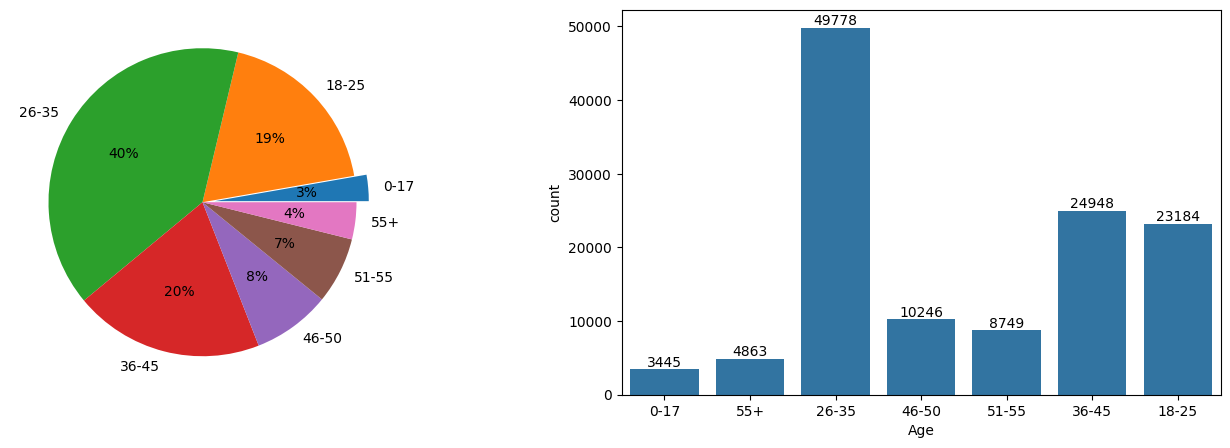

In [ ]:
plt.figure(figsize = (17,5))

plt.subplot(1,2,1)
labels = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']
plt.pie(df.groupby('Age')['Age'].count(), labels = labels, explode = (0.08,0,0,0,0,0,0), autopct = '%0.0f%%')

plt.subplot(1,2,2)
label = sns.countplot(data = df, x='Age')
for i in label.containers:
    label.bar_label(i)

plt.show()

<Axes: xlabel='Age', ylabel='Product_Category'>

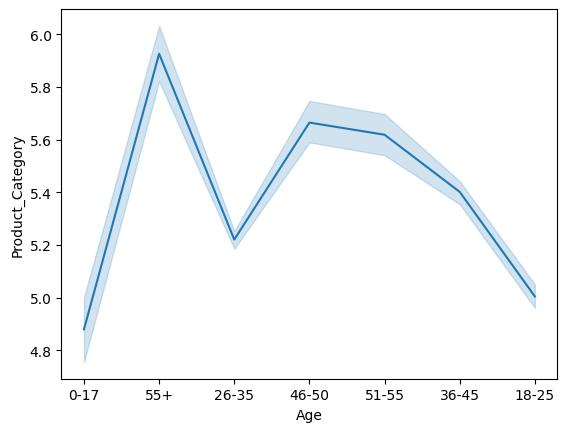

In [ ]:
sns.lineplot(data=df,x="Age",y="Product_Category")

<ipython-input-61-4384e404aa3b>:2: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



  sns.boxplot(data=df,x="Age",y="Purchase",palette="Set3")


Text(0.5, 1.0, 'Age vs Purchase')

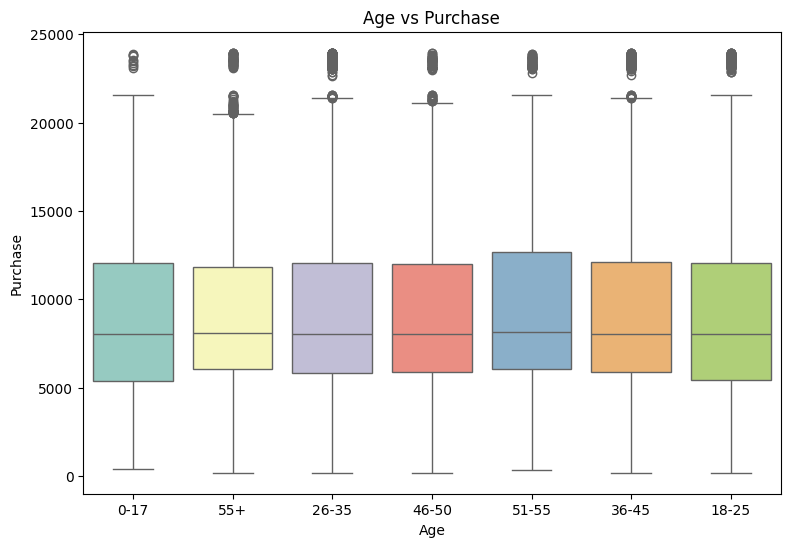

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(data=df,x="Age",y="Purchase",palette="Set3")
plt.title("Age vs Purchase")

We cannot see much difference in the median purchase values for different age groups.


In [ ]:
df.groupby(["Age"])["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,3445.0,9087.653120,5081.181592,405.0,5376.00,8059.0,12051.00,23866.0
18-25,23184.0,9200.716442,5002.807180,197.0,5423.00,8021.0,12039.00,23954.0
26-35,49778.0,9294.094459,4967.673930,185.0,5828.00,8038.0,12050.00,23961.0
36-45,24948.0,9365.214807,4983.568441,193.0,5894.75,8062.0,12101.25,23949.0
46-50,10246.0,9235.462522,4903.341998,186.0,5887.25,8033.0,11990.75,23930.0
51-55,8749.0,9617.439707,5034.248000,347.0,6067.00,8154.0,12663.00,23912.0
55+,4863.0,9349.828090,4906.870723,192.0,6045.00,8119.0,11838.50,23958.0




*   The average order value is highest for age group 51-55 which is around 9534.


*   The average order value is highest for age group 51-55 which is around 9534.


*   The highest order value for all the groups is around 23960.


*   The losest order value is 12 for all the groups.


















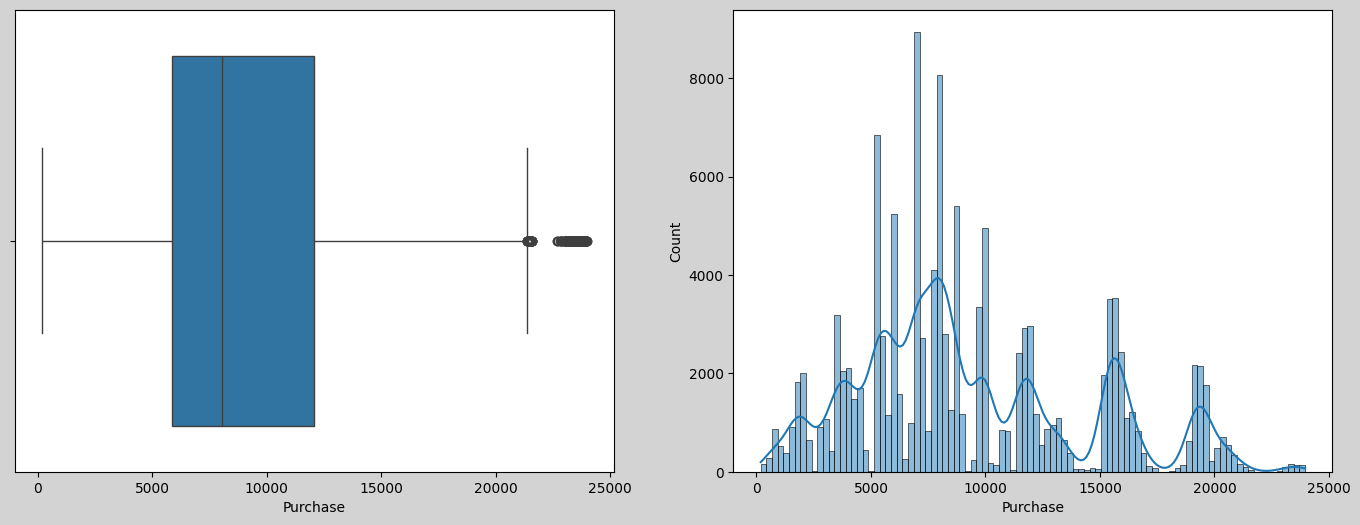

In [ ]:
plt.figure(figsize=(17, 6)).set_facecolor("lightgrey")

plt.subplot(1,2,1)
sns.boxplot(data=df, x='Purchase', orient='h')

plt.subplot(1,2,2)
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

While observing the purchase values of the orders we can infer that

Most of the values lies between 6000 and 12000.

Most order values lies in the range of 5000 - 10000

There are more orders in the range 15000 - 16000 followed by 11000 - 11500 range and a few also in the 19000 - 20000 range.

<Axes: xlabel='Occupation', ylabel='count'>

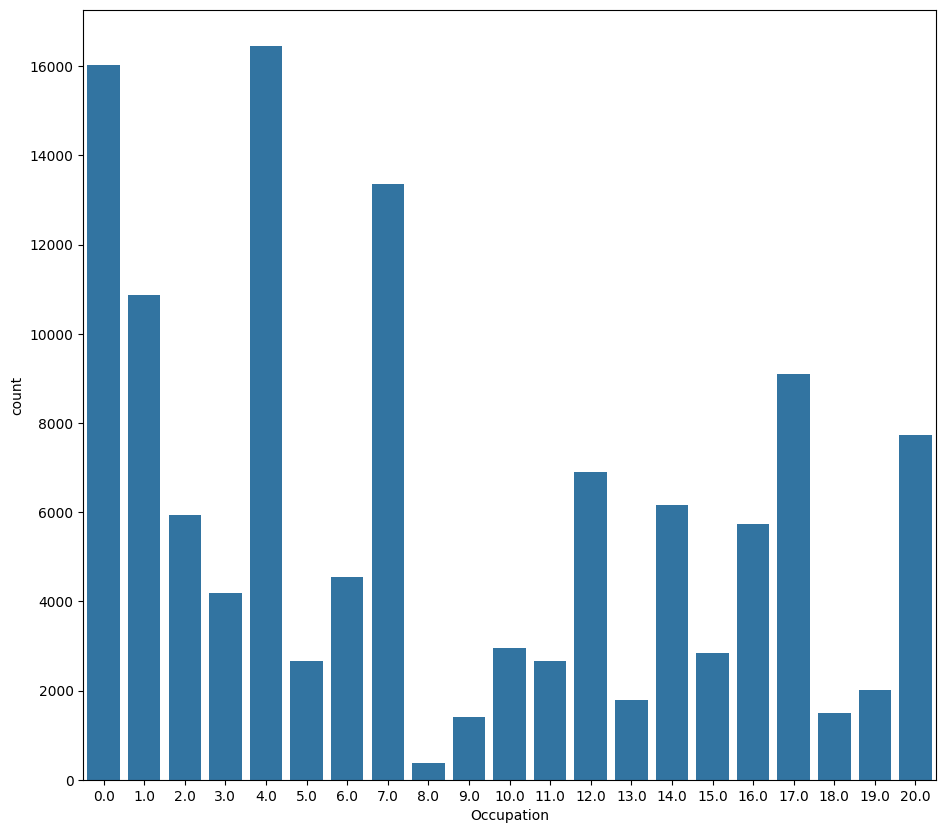

In [ ]:
plt.figure(figsize=(11,10))
sns.countplot(data = df, x='Occupation')


People having occupation 4 are the most frequent buyers followed by occupation 0 and 7.

People having occupation 8 are the least frequent buyers followed by occupation 9 and 18.

<ipython-input-65-814b50fbf947>:2: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



  sns.boxplot(data=df,x="Occupation",y="Purchase",palette = "Set3")


Text(0.5, 1.0, 'Occupation vs Purchase')

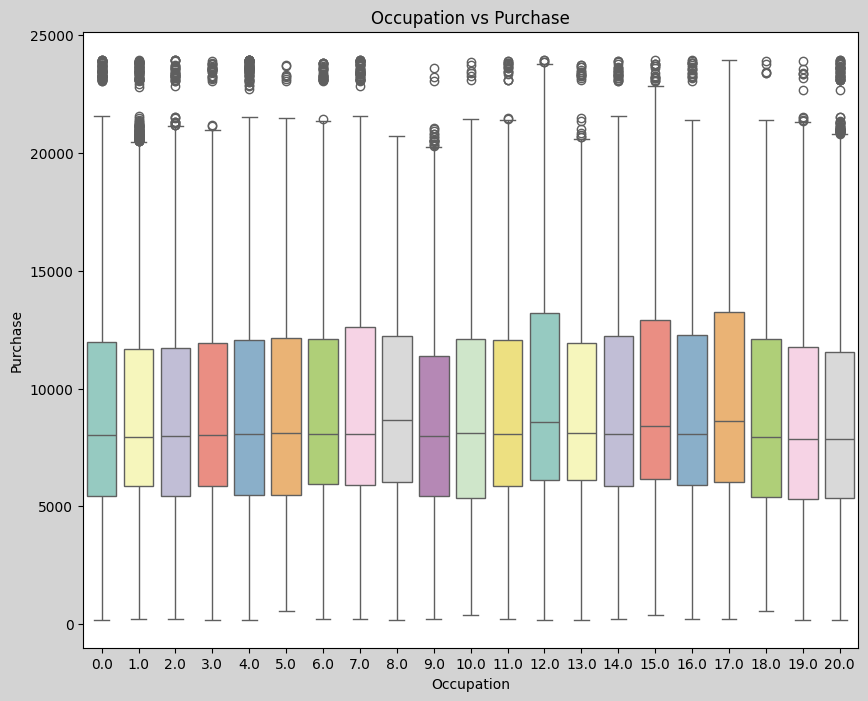

In [ ]:
plt.figure(figsize=(10,8)).set_facecolor('lightgrey')
sns.boxplot(data=df,x="Occupation",y="Purchase",palette = "Set3")
plt.title("Occupation vs Purchase")

In [ ]:
df.groupby(['Occupation'])['Purchase'].describe()


,count,mean,std,min,25%,50%,75%,max
Occupation,,,,,,,,
0.0,16023.0,9140.268052,4915.966450,192.0,5448.00,8010.0,11955.50,23961.0
1.0,10877.0,8969.414544,4772.994945,216.0,5848.00,7953.0,11700.00,23954.0
2.0,5943.0,9023.576981,4900.253347,213.0,5443.50,7971.0,11724.00,23954.0
3.0,4186.0,9267.082179,4995.432321,188.0,5870.25,8021.0,11930.25,23889.0
4.0,16446.0,9307.353642,5036.576947,188.0,5465.00,8058.5,12080.00,23961.0
5.0,2663.0,9381.591438,4969.274820,556.0,5466.00,8120.0,12126.00,23752.0
6.0,4554.0,9428.341458,5029.351235,214.0,5935.25,8079.5,12106.00,23841.0
7.0,13367.0,9484.330291,5058.194734,210.0,5904.50,8076.0,12626.50,23948.0
8.0,365.0,9704.356164,4820.882729,193.0,6030.00,8684.0,12249.00,20731.0


But, here we can observe that the highest median value is for occupation 17

The lowest median value is for occupation 19.

Occupation 17 have the high average order values compared to other occupations which is 9821.

Occupation 9 have the lowest average order value which is 8637.

<ipython-input-67-455bdd621e7c>:2: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



  sns.boxplot(data = df, y ='Purchase', x = 'City_Category', palette = 'Set3')


Text(0.5, 1.0, 'Purchase vs City_Category')

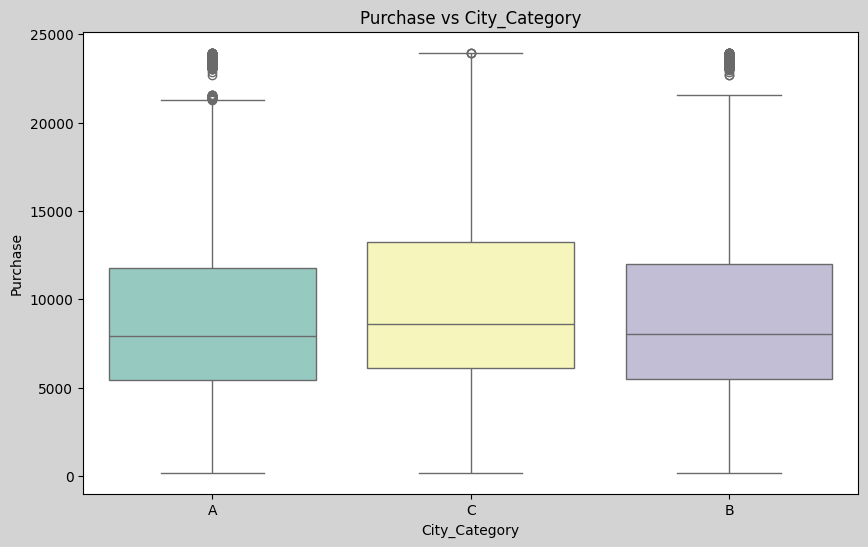

In [ ]:
plt.figure(figsize = (10,6)).set_facecolor("lightgrey")
sns.boxplot(data = df, y ='Purchase', x = 'City_Category', palette = 'Set3')
plt.title('Purchase vs City_Category')

City Category c has the highest median value followed by city B and city A.

There are a few outliers fro city A and B.

In [ ]:
df.groupby(['City_Category'])['Purchase'].describe()


,count,mean,std,min,25%,50%,75%,max
City_Category,,,,,,,,
A,34128.0,8901.440518,4851.506214,185.0,5405.0,7920.0,11758.00,23961.0
B,52335.0,9182.075189,4935.385409,188.0,5464.0,8006.0,12002.00,23954.0
C,38750.0,9827.268748,5102.130554,187.0,6094.0,8614.0,13238.75,23961.0


We can also observe that the mean value for a order is highest for city C followed by B and A.


<ipython-input-69-e9ed21819387>:2: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



  sns.boxplot(data = df, y ='Purchase', x = 'Product_Category', palette = 'Set3')


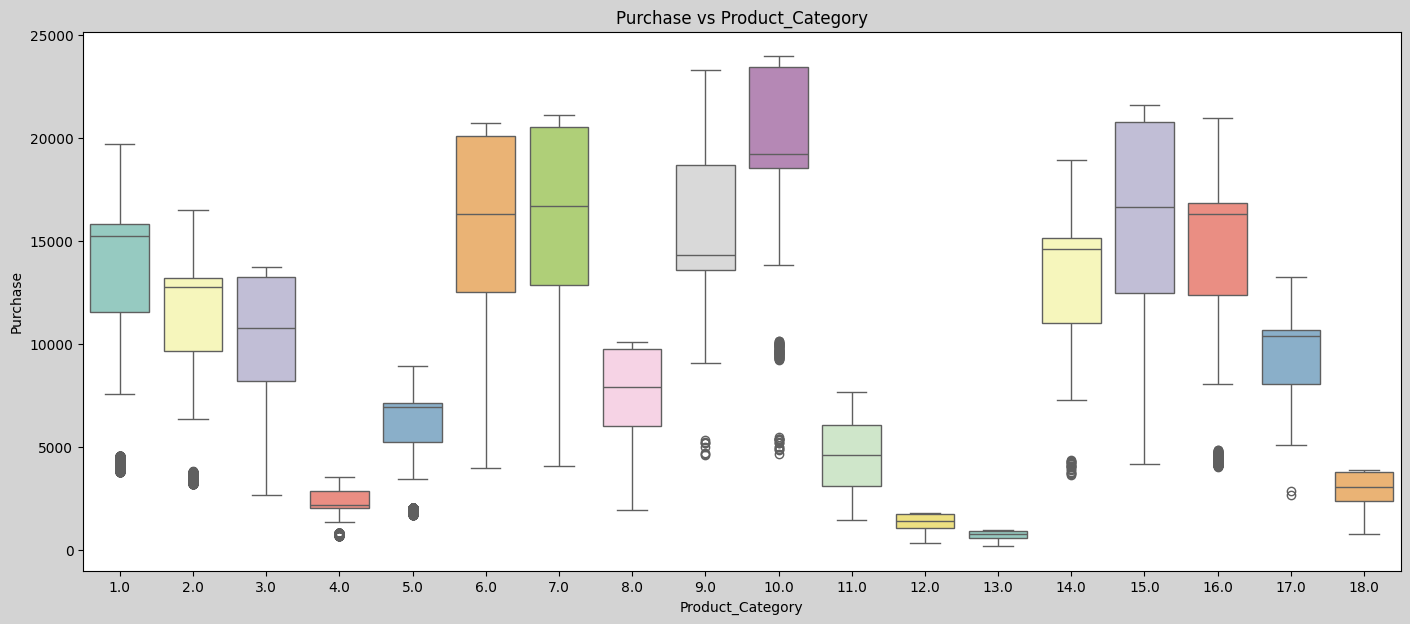

In [ ]:
plt.figure(figsize = (17,7)).set_facecolor("lightgrey")
sns.boxplot(data = df, y ='Purchase', x = 'Product_Category', palette = 'Set3')
plt.title('Purchase vs Product_Category')
plt.show()

We can clearly observe hige differences in the median values for all the product categories.


In [ ]:
df.groupby(['Product_Category'])['Purchase'].describe()


,count,mean,std,min,25%,50%,75%,max
Product_Category,,,,,,,,
1.0,32051.0,13589.783096,4314.239816,3790.0,11541.00,15246.0,15809.00,19708.0
2.0,5457.0,11239.785780,3601.974313,3176.0,9633.00,12737.0,13207.00,16504.0
3.0,4707.0,10134.100276,2818.312309,2640.0,8206.00,10749.0,13223.50,13717.0
4.0,2714.0,2310.708548,823.742426,684.0,2055.00,2169.0,2837.00,3556.0
5.0,34657.0,6224.643939,1906.137304,1713.0,5239.00,6910.0,7151.00,8907.0
6.0,4602.0,15863.113429,4028.007823,3981.0,12495.25,16303.0,20060.00,20690.0
7.0,851.0,16427.625147,4175.298161,4069.0,12874.50,16692.0,20497.50,21079.0
8.0,26257.0,7491.444758,2027.611098,1939.0,6035.00,7905.0,9726.00,10082.0
9.0,105.0,15360.885714,5192.506752,4595.0,13594.00,14321.0,18672.00,23267.0


The median value for product category 10 is the highest which is 19197.

The median value for product category 19 is the lowest which is only 37.

The average order value for category 10 is the highest which is 19675.

The average order value for category 19 is also the lowest which is 37.

Clearly, category 19 is the least preferred or least frequent bought product category.

**Multi-variate Analysis**


Lets see Male vs Female Purchase habits age wise.



Text(0.5, 1.0, 'Male vs Female Purchase habits age wise')

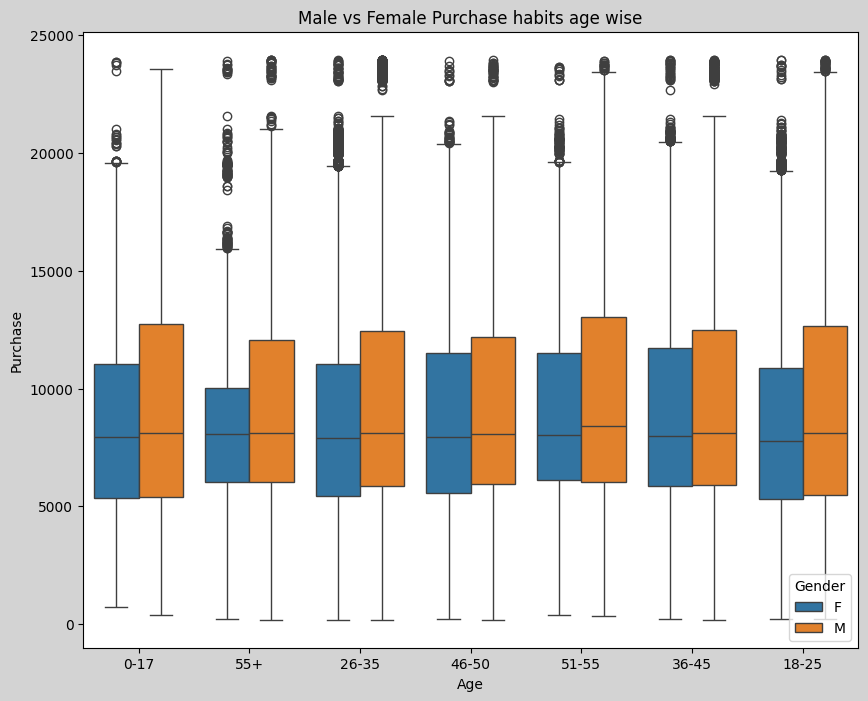

In [ ]:
plt.figure(figsize=(10,8)).set_facecolor('lightgrey')
sns.boxplot(data=df,x="Age",y="Purchase",hue="Gender")
plt.title('Male vs Female Purchase habits age wise')

Lets see Male vs Female City wise purchase habits.



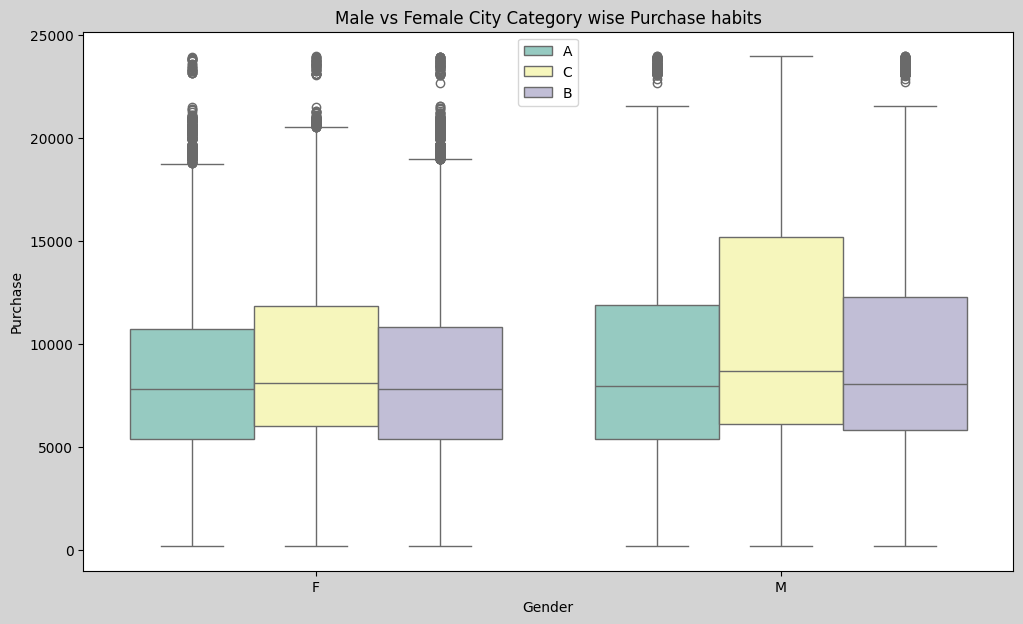

In [ ]:
plt.figure(figsize = (12,7)).set_facecolor("lightgrey")
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3')
plt.legend(loc=9)
plt.title("Male vs Female City Category wise Purchase habits")
plt.show()

The median value for females in city category C is highest compared to city A and B.

The median value for males in city category C is also highest compared to city A and B.

**Lets see Male vs Female Marital Status wise purchase habits.**



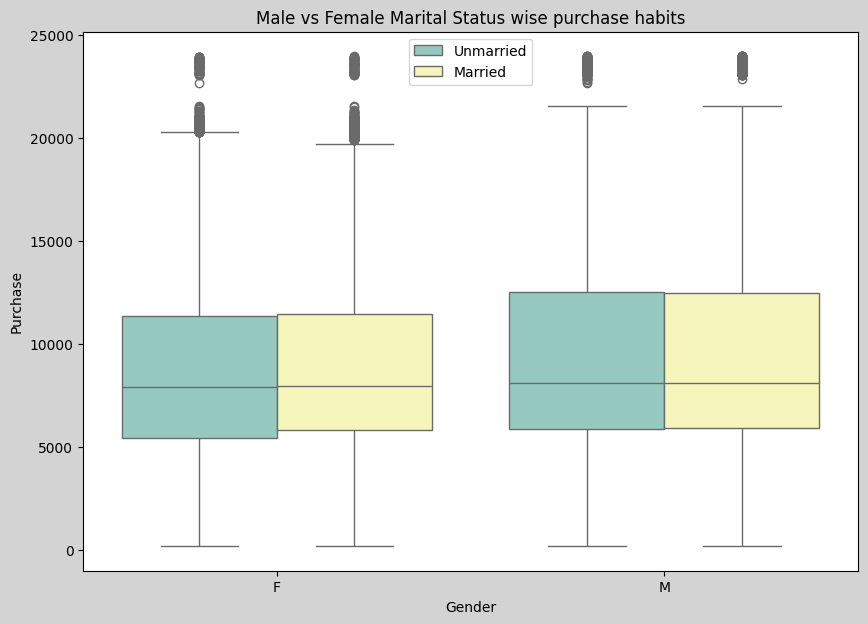

In [ ]:
plt.figure(figsize = (10,7)).set_facecolor("lightgrey")
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3')
plt.legend(loc=9)
plt.title('Male vs Female Marital Status wise purchase habits')
plt.show()

There is no effect of marital status on the spending habits of both the genders.

While we can observe that the median values for Male is higher comapred to Females.

Lets see Male vs Female Stay Years in Current City wise Purchase Habits



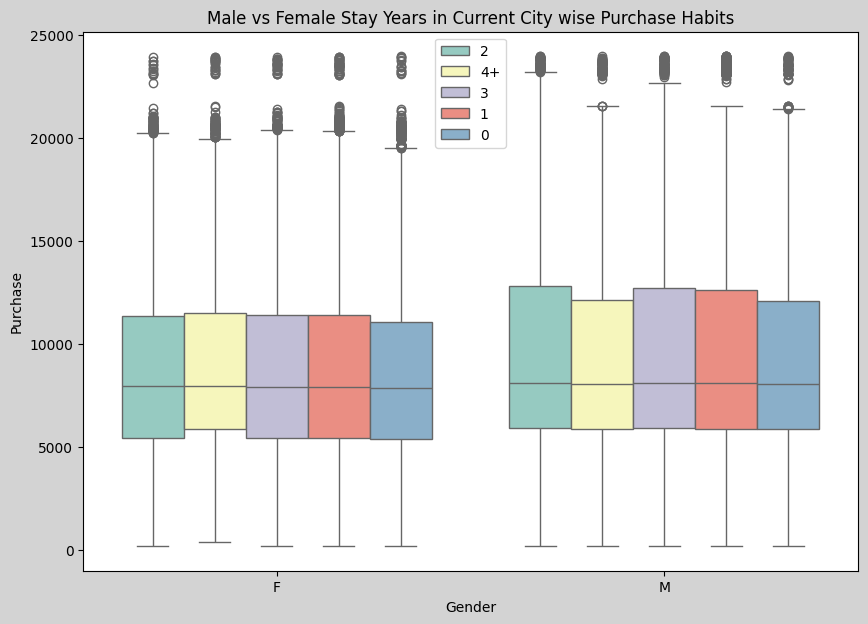

In [ ]:
plt.figure(figsize = (10,7)).set_facecolor("lightgrey")
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3')
plt.legend(loc=9)
plt.title('Male vs Female Stay Years in Current City wise Purchase Habits')
plt.show()


**Inference**

80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)

75% of the users are Male and 25% are Female. Males clearly purchase more than females.

59% Single, 41% Married

35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years

The majority of our customers come from city category B but customers come from City category C spent more as mean is 9719.

The majority of users come from City Category C, but more people from City Category B tend to purchase, which suggests the same users visit the mall multiple times in City Category B.

Majority of Customers purchase within the 5,000 - 20,000 range.

Most mall customers are between the ages of 26 and 35.60% of purchases are made by people between the ages of 26 and 45

City Category B accounts for 42%, City Category C 31%, and City Category A represents 27% of all customer purchases.Purchases are high in city category C

Most mall customers are between the ages of 26 and 35. City category C has more customers between the ages of 18 and 45.

In City Category C, there are slightly more female customers.

Product 5 and 8 is common among females.




**Recommendations**

Men spent more money than women, So company should focus on retaining the male customers and getting more male customers.

Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. it means these are the products in these categories are liked more by customers. Company can focus on * selling more of these products or selling more of the products which are purchased less.

Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.

Customers in the age 18-45 spend more money than the others, So company should focus on acquisition of customers who are in the age 18-45.

Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.

In light of the fact that females spend less than males on average, management needs to focus on their specific needs differently. Adding some additional offers for women can increase their spending on Black Friday.

Management should come-up with some games in the mall to attract more younger generation will can help them to increase the sale.

The management should have some offers on kids (0-17 years) in order to increase sales.

In order to attract more young shoppers, they can offer some games for the younger generation.